In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
from keras.layers.embeddings import Embedding
import pandas
import tensorflow as tf
import csv
from keras.preprocessing.text import one_hot,Tokenizer
from __future__ import absolute_import, division, print_function, unicode_literals


from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from google.colab.patches import cv2_imshow
from numpy import expand_dims
import os
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from google.colab.patches import cv2_imshow
import numpy as np

import random
import pickle
from keras.utils import np_utils
from tensorflow.image import rgb_to_grayscale
import skimage
from keras import optimizers
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM
from keras.layers import BatchNormalization, Activation, Reshape, Lambda, GRU, SimpleRNN,TimeDistributed
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [0]:
MAX_DOCUMENT_LENGTH = 100
N_FILTERS1 = 10
N_FILTERS2 = 10
POOLING_WINDOW1 = 4
POOLING_STRIDE1 = 2
POOLING_WINDOW2 = 4
POOLING_STRIDE2 = 2
MAX_LABEL = 15

no_epochs = 100
lr = 0.01
batch_size = 128
tf.logging.set_verbosity(tf.logging.ERROR)
seed = 10
tf.set_random_seed(seed)

#These functions are for reading files.

In [0]:
def read_data_chars():
  
  x_train, y_train, x_test, y_test = [], [], [], []

  with open('/content/drive/My Drive/CZ4042/train_medium.csv', encoding='utf-8') as filex:
    reader = csv.reader(filex)
    for row in reader:
      x_train.append(row[1])
      y_train.append(int(row[0]))

  with open('/content/drive/My Drive/CZ4042/test_medium.csv', encoding='utf-8') as filex:
    reader = csv.reader(filex)
    for row in reader:
      x_test.append(row[1])
      y_test.append(int(row[0]))
  
  x_train = pandas.Series(x_train)
  y_train = pandas.Series(y_train)
  x_test = pandas.Series(x_test)
  y_test = pandas.Series(y_test)
  
  print(x_train[0])

  char_processor = tf.contrib.learn.preprocessing.ByteProcessor(MAX_DOCUMENT_LENGTH)
  x_train = np.array(list(char_processor.fit_transform(x_train)))
  x_test = np.array(list(char_processor.transform(x_test)))
  y_train = y_train.values
  y_test = y_test.values
  print(x_train[0]) 
  return x_train, y_train, x_test, y_test


In [0]:
def chars_hot():
  x_train, y_train, x_test, y_test = read_data_chars() 
  print(len(x_train))
  print(len(x_test))
  print(y_train[0])
  print(y_train.shape)
  
  y_train_hot =np_utils.to_categorical(y_train)
  y_test_hot =np_utils.to_categorical(y_test)
  x_train_hot =np_utils.to_categorical(x_train, num_classes=256)
  x_test_hot =np_utils.to_categorical(x_test, num_classes=256)
  x_train_hot = np.array(x_train_hot).reshape(-1, MAX_DOCUMENT_LENGTH,256, 1)
  x_test_hot = np.array(x_test_hot).reshape(-1, MAX_DOCUMENT_LENGTH,256, 1) 
  print(x_train_hot.shape)
  print(x_test_hot.shape)
  return x_train_hot, y_train_hot, x_test_hot, y_test_hot

def chars():
  x_train, y_train, x_test, y_test = read_data_chars() 
  print(len(x_train))
  print(len(x_test))
  print(y_train[0])
  print(y_train.shape)
  
  y_train_hot =np_utils.to_categorical(y_train)
  y_test_hot =np_utils.to_categorical(y_test)
  x_train = np.array(x_train).reshape(-1, MAX_DOCUMENT_LENGTH, 1) #np.array(x_train,dtype=np.float32).reshape(-1, MAX_DOCUMENT_LENGTH, 1)
  x_test = np.array(x_test).reshape(-1, MAX_DOCUMENT_LENGTH, 1) #np.array(x_test,dtype=np.float32).reshape(-1, MAX_DOCUMENT_LENGTH, 1) 
  #x_train = (x_train - np.min(x_train, axis = 0))/np.max(x_train, axis = 0)
  #x_test = (x_test - np.min(x_test, axis = 0))/np.max(x_test, axis = 0)
  #print(x_train_hot.shape)
  #print(x_test_hot.shape)
  return x_train, y_train_hot, x_test, y_test_hot

In [0]:
MAX_DOCUMENT_LENGTH = 100

def read_data_words():
  
  x_train, y_train, x_test, y_test = [], [], [], []

  with open('/content/drive/My Drive/CZ4042/train_medium.csv', encoding='utf-8') as filex:
    reader = csv.reader(filex)
    for row in reader:
      x_train.append(row[1])
      y_train.append(int(row[0]))

  with open('/content/drive/My Drive/CZ4042/test_medium.csv', encoding='utf-8') as filex:
    reader = csv.reader(filex)
    for row in reader:
      x_test.append(row[1])
      y_test.append(int(row[0]))
  
  x_train = pandas.Series(x_train)
  y_train = pandas.Series(y_train)
  x_test = pandas.Series(x_test)
  y_test = pandas.Series(y_test)
  
  word_processor = tf.contrib.learn.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH)
  x_train = np.array(list(word_processor.fit_transform(x_train)))
  x_test = np.array(list(word_processor.transform(x_test)))
  y_train = y_train.values
  y_test = y_test.values
  return x_train, y_train, x_test, y_test

In [0]:
vocab_size = 9192

def words():
  x_train, y_train, x_test, y_test = read_data_words()
  #print(len(x_train))
  #print(len(x_test))
  #print(y_train[0])
  #print(y_train.shape)
  #np.max(np.array(np.max(x_test),np.max(x_train)))
  #encoded_docs = [one_hot(d, vocab_size) for d in docs]
  print(x_train[0])
  y_train =np_utils.to_categorical(y_train)
  y_test =np_utils.to_categorical(y_test)
  #x_train_hot =np_utils.to_categorical(x_train,num_classes = vocab_size)
  #x_test_hot =np_utils.to_categorical(x_test,num_classes = vocab_size)

  #x_train_hot = np.array(x_train_hot).reshape(-1, MAX_DOCUMENT_LENGTH, vocab_size)
  #x_test_hot = np.array(x_test_hot).reshape(-1, MAX_DOCUMENT_LENGTH, vocab_size)
  #print(x_train_hot.shape)
  #print(x_test_hot.shape) 
  #print(x_train_hot[0])
  print(x_train.shape)
  return x_train, y_train, x_test, y_test

#Question 1

In [0]:
x_train1, y_train1, x_test1, y_test1= chars_hot()
#lr = 10**-3 # 10**-2
model = Sequential()
model.add(Conv2D(N_FILTERS1, (20, 256), input_shape=x_train1[0].shape, padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=POOLING_WINDOW1,strides = POOLING_STRIDE1,padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(N_FILTERS2, (20, 1), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=POOLING_WINDOW2,strides = POOLING_STRIDE2,padding='same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(MAX_LABEL,activation = 'softmax'))
opt = optimizers.Adam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)

Park Dinor
[ 80  97 114 107  32  68 105 110 111 114   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
5600
700
7
(5600,)
(5600, 100, 256, 1)
(700, 100, 256, 1)
Train on 5600 samples, validate on 700 samples
Epoch 1/100
5600/5600 [==============================] - 2s 399us/step - loss: 2.8948 - acc: 0.1266 - val_loss: 2.7063 - val_acc: 0.1514
Epoch 2/100
5600/5600 [==============================] - 1s 108us/step - loss: 2.4032 - acc: 0.2416 - val_loss: 2.4522 - val_acc: 0.2229
Epoch 3/100
5600/5600 [==============================] - 1s 109us/step - loss: 2.1760 - acc: 0.3080 - val_loss: 2.4404 - val_acc: 0.2400
Epoch 4/100
5600/5600 [==============================] - 1s 110us/

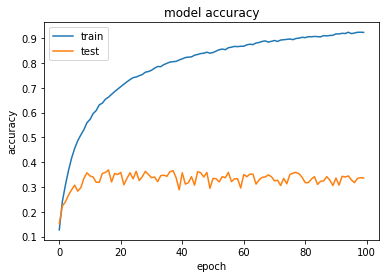

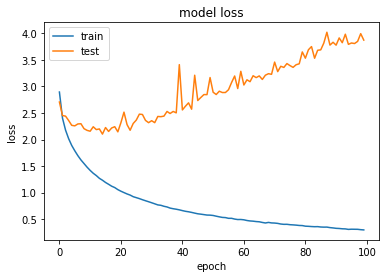

In [0]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Question 2

In [0]:
no_epochs = 100
lr = 10**-3 # 10**-4
x_train1, y_train1, x_test1, y_test1 = words()

model = Sequential()

model.add(Embedding(vocab_size, 200, input_length=MAX_DOCUMENT_LENGTH))
model.add(Reshape((MAX_DOCUMENT_LENGTH, 200,1)))
model.add(Conv2D(N_FILTERS1, (20, 20), input_shape = x_train1.shape[1:], padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=POOLING_WINDOW1,strides = POOLING_STRIDE1,padding='same'))
#model.add(BatchNormalization())
model.add(Conv2D(N_FILTERS2, (20, 1), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=POOLING_WINDOW2,strides = POOLING_STRIDE2,padding='same'))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(MAX_LABEL,activation = 'softmax'))
opt = optimizers.Adam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)

[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(5600, 100)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 200)          1838400   
_________________________________________________________________
reshape_5 (Reshape)          (None, 100, 200, 1)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 81, 181, 10)       4010      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 41, 91, 10)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 22, 91, 10)        2010      
___________________________________

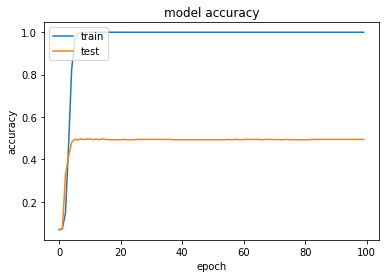

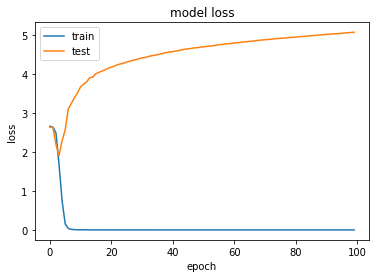

In [0]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#Question 3

In [25]:
x_train1, y_train1, x_test1, y_test1= chars()
lr = 10**-4 #10**-4
no_epochs = 100

model = Sequential()
model.add(GRU(20,input_shape =x_train1.shape[1:],return_sequences=False))
#model.add(BatchNormalization())
#model.add(TimeDistributed(Dense(30,activation='sigmoid')))
#model.add(Flatten())
model.add(Dense(MAX_LABEL))
model.add(Activation('softmax'))
opt = optimizers.Adam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)

Park Dinor
[ 80  97 114 107  32  68 105 110 111 114   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
5600
700
7
(5600,)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_7 (GRU)                  (None, 20)                1320      
_________________________________________________________________
dense_7 (Dense)              (None, 15)                315       
_________________________________________________________________
activation_7 (Activation)    (None, 15)                0         
Total params: 1,635
Trainable params: 1,635
Non-trainable params: 0
___________

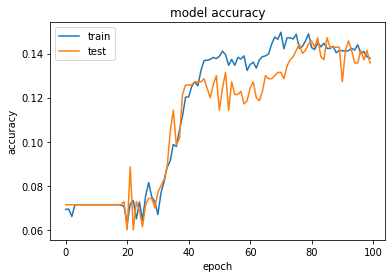

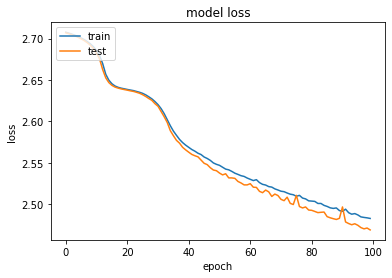

In [26]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Question 4

In [40]:
x_train1, y_train1, x_test1, y_test1 = words()
lr = 10**-4
no_epochs = 100

model = Sequential()

model.add(Embedding(vocab_size, 200, input_length=MAX_DOCUMENT_LENGTH))
#model.add(Reshape((MAX_DOCUMENT_LENGTH, 200,1)))
model.add(GRU(20,input_shape =x_train1.shape[1:],activation='sigmoid',return_sequences=False))
#model.add(BatchNormalization())
model.add(Dense(MAX_LABEL))
model.add(Activation('softmax'))
opt = optimizers.Adam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)

[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(5600, 100)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 200)          1838400   
_________________________________________________________________
gru_15 (GRU)                 (None, 20)                13260     
_________________________________________________________________
dense_15 (Dense)             (None, 15)                315       
_________________________________________________________________
activation_15 (Activation)   (None, 15)                0         
Total params: 1,851,975
Trainable params: 1,851,975
Non-trainable params: 0
_________________________________________________________________
None
Train on 5600 sample

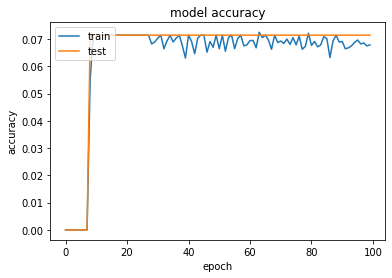

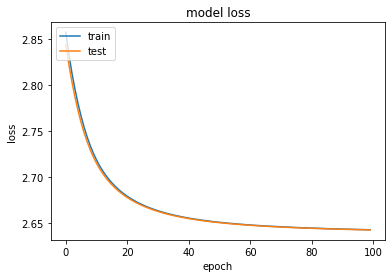

In [41]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Question 5

##Dropout experiment for Q1

In [42]:
x_train, y_train, x_test, y_test= chars_hot()
no_epochs = 30
lr = 10**-4
history_train_acc = []
history_val_acc = []
history_train_loss = []
history_val_loss = []
for i in range(6):
  model = Sequential()
  model.add(Conv2D(N_FILTERS1, (20, 256), input_shape=x_train[0].shape, padding='valid',activation='relu'))
  model.add(MaxPooling2D(pool_size=POOLING_WINDOW1,strides = POOLING_STRIDE1,padding='same'))
  model.add(Dropout(0.05*i))
  model.add(BatchNormalization())
  model.add(Conv2D(N_FILTERS2, (20, 1), padding='valid',activation='relu'))
  model.add(MaxPooling2D(pool_size=POOLING_WINDOW2,strides = POOLING_STRIDE2,padding='same'))
  model.add(Dropout(0.05*i))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(MAX_LABEL,activation = 'softmax'))
  opt = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=no_epochs,batch_size = 128)
  history_train_acc.append(history.history['acc'][-1])
  history_val_acc.append(history.history['val_acc'][-1])
  history_train_loss.append(history.history['loss'][-1])
  history_val_loss.append(history.history['val_loss'][-1])

Park Dinor
[ 80  97 114 107  32  68 105 110 111 114   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
5600
700
7
(5600,)
(5600, 100, 256, 1)
(700, 100, 256, 1)
Train on 5600 samples, validate on 700 samples
Epoch 1/30
5600/5600 [==============================] - 6s 1ms/step - loss: 3.0251 - acc: 0.0966 - val_loss: 3.2727 - val_acc: 0.0900
Epoch 2/30
5600/5600 [==============================] - 1s 105us/step - loss: 2.5902 - acc: 0.1718 - val_loss: 2.7157 - val_acc: 0.1443
Epoch 3/30
5600/5600 [==============================] - 1s 103us/step - loss: 2.3839 - acc: 0.2391 - val_loss: 2.6771 - val_acc: 0.1700
Epoch 4/30
5600/5600 [==============================] - 1s 102us/step -

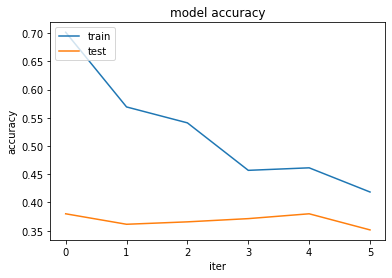

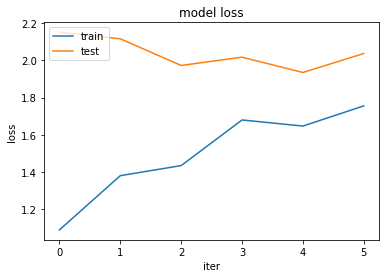

In [43]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history_train_acc)
plt.plot(history_val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('iter')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history_train_loss)
plt.plot(history_val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('iter')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Dropout experiment for Question 2

In [48]:
no_epochs = 40
lr = 10**-4

history_train_acc = []
history_val_acc = []
history_train_loss = []
history_val_loss = []
for i in range(6):

  x_train1, y_train1, x_test1, y_test1 = words()
  model = Sequential()

  model.add(Embedding(vocab_size, 200, input_length=MAX_DOCUMENT_LENGTH))
  model.add(Reshape((MAX_DOCUMENT_LENGTH, 200,1)))
  model.add(Conv2D(N_FILTERS1, (20, 20), input_shape = x_train1.shape[1:], padding='valid',activation='relu'))
  model.add(MaxPooling2D(pool_size=POOLING_WINDOW1,strides = POOLING_STRIDE1,padding='same'))
  #model.add(BatchNormalization())
  model.add(Dropout(0.05*i))
  model.add(Conv2D(N_FILTERS2, (20, 1), padding='valid',activation='relu'))
  model.add(MaxPooling2D(pool_size=POOLING_WINDOW2,strides = POOLING_STRIDE2,padding='same'))
  #model.add(BatchNormalization())
  model.add(Dropout(0.05*i))
  model.add(Flatten())
  model.add(Dense(MAX_LABEL,activation = 'softmax'))
  opt = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  print(model.summary())
  history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)
  history_train_acc.append(history.history['acc'][-1])
  history_val_acc.append(history.history['val_acc'][-1])
  history_train_loss.append(history.history['loss'][-1])
  history_val_loss.append(history.history['val_loss'][-1])

[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(5600, 100)
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 100, 200)          1838400   
_________________________________________________________________
reshape_7 (Reshape)          (None, 100, 200, 1)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 81, 181, 10)       4010      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 41, 91, 10)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 41, 91, 10)        0         
___________________________________

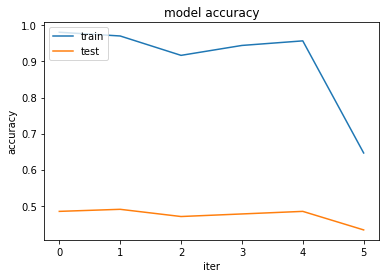

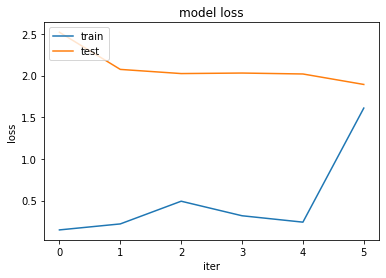

In [49]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history_train_acc)
plt.plot(history_val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('iter')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history_train_loss)
plt.plot(history_val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('iter')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Dropout experiment for Question 3

In [50]:
no_epochs = 40
lr = 10**-3

history_train_acc = []
history_val_acc = []
history_train_loss = []
history_val_loss = []
for i in range(6):

  x_train1, y_train1, x_test1, y_test1 = chars()
  model = Sequential()

  model = Sequential()
  model.add(GRU(20,input_shape =x_train1.shape[1:],activation='tanh',return_sequences=False))
  #model.add(BatchNormalization())
  #model.add(TimeDistributed(Dense(30,activation='sigmoid')))
  #model.add(Flatten())
  model.add(Dropout(0.05*i))
  model.add(Dense(MAX_LABEL))
  model.add(Activation('softmax'))
  opt = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  print(model.summary())
  history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)
  history_train_acc.append(history.history['acc'][-1])
  history_val_acc.append(history.history['val_acc'][-1])
  history_train_loss.append(history.history['loss'][-1])
  history_val_loss.append(history.history['val_loss'][-1])

Park Dinor
[ 80  97 114 107  32  68 105 110 111 114   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
5600
700
7
(5600,)
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_19 (GRU)                 (None, 20)                1320      
_________________________________________________________________
dropout_40 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 15)                315       
_________________________________________________________________
activation_1

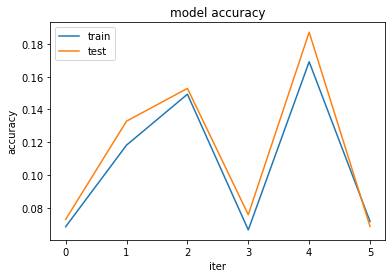

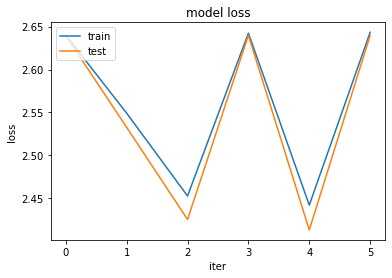

In [51]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history_train_acc)
plt.plot(history_val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('iter')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history_train_loss)
plt.plot(history_val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('iter')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Dropout experiment for Question 4

In [52]:
no_epochs = 50
lr = 10**-2

history_train_acc = []
history_val_acc = []
history_train_loss = []
history_val_loss = []
for i in range(6):

  x_train1, y_train1, x_test1, y_test1 = words()
  model = Sequential()

  model.add(Embedding(vocab_size, 200, input_length=MAX_DOCUMENT_LENGTH))
  #model.add(Reshape((MAX_DOCUMENT_LENGTH, 200,1)))
  model.add(GRU(20,input_shape =x_train1.shape[1:],activation='sigmoid',return_sequences=False))
  model.add(BatchNormalization())
  model.add(Dropout(0.05*i)) 
  model.add(Dense(MAX_LABEL))
  model.add(Activation('softmax'))
  opt = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  print(model.summary())
  history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)
  history_train_acc.append(history.history['acc'][-1])
  history_val_acc.append(history.history['val_acc'][-1])
  history_train_loss.append(history.history['loss'][-1])
  history_val_loss.append(history.history['val_loss'][-1])
  model = Sequential()

[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(5600, 100)
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 100, 200)          1838400   
_________________________________________________________________
gru_25 (GRU)                 (None, 20)                13260     
_________________________________________________________________
batch_normalization_23 (Batc (None, 20)                80        
_________________________________________________________________
dropout_46 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 15)                315       
___________________________________

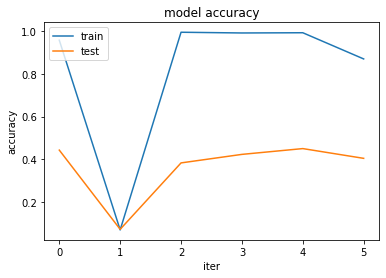

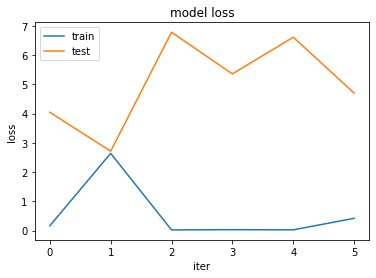

In [54]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history_train_acc)
plt.plot(history_val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('iter')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history_train_loss)
plt.plot(history_val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('iter')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Question 6

For this question, we would only analyse text RNN, parameters given were lr = $10^{-3}$. Batch normalization was applied.

##Choosing between LSTM, SimpleRNN, or GRU.

In [66]:
x_train1, y_train1, x_test1, y_test1= chars()

lr = 10**-3
no_epochs = 100

model = Sequential()
#model.add(Embedding(vocab_size, 200, input_length=MAX_DOCUMENT_LENGTH))
model.add(SimpleRNN(20,input_shape =x_train1.shape[1:],return_sequences=False))
#model.add(BatchNormalization())
#model.add(TimeDistributed(Dense(30,activation='sigmoid')))
#model.add(Flatten())
model.add(Dense(MAX_LABEL))
model.add(Activation('softmax'))
opt = optimizers.Adam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)

Park Dinor
[ 80  97 114 107  32  68 105 110 111 114   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
5600
700
7
(5600,)
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_54 (Dense)             (None, 15)                315       
_________________________________________________________________
activation_36 (Activation)   (None, 15)                0         
Total params: 755
Trainable params: 755
Non-trainable params: 0
______________

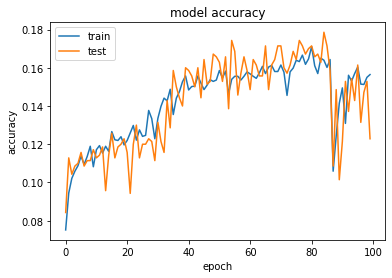

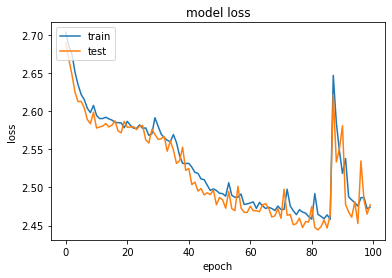

In [67]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
x_train1, y_train1, x_test1, y_test1 = chars()

lr = 10**-3
no_epochs = 100

model = Sequential()

#model.add(Embedding(vocab_size, 200, input_length=MAX_DOCUMENT_LENGTH))

model.add(LSTM(20,input_shape =x_train1.shape[1:],return_sequences=False))
#model.add(BatchNormalization())
model.add(Dense(MAX_LABEL))
model.add(Activation('softmax'))
opt = optimizers.Adam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)

Park Dinor
[ 80  97 114 107  32  68 105 110 111 114   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
5600
700
7
(5600,)
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_56 (Dense)             (None, 15)                315       
_________________________________________________________________
activation_38 (Activation)   (None, 15)                0         
Total params: 2,075
Trainable params: 2,075
Non-trainable params: 0
__________

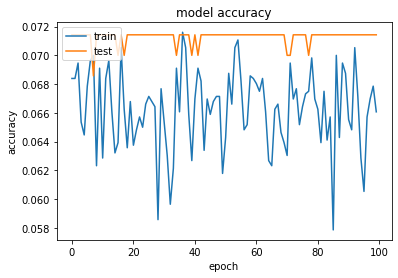

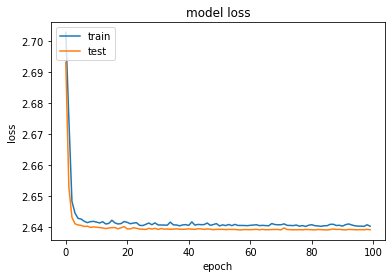

In [70]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The more suitable RNN layer was GRU. We would use this layer for next experiment.

In [71]:
x_train1, y_train1, x_test1, y_test1 = chars()

lr = 10**-3
no_epochs = 100

model = Sequential()

#model.add(Embedding(vocab_size, 200, input_length=MAX_DOCUMENT_LENGTH))

model.add(GRU(20,input_shape =x_train1.shape[1:],return_sequences=True))
#model.add(BatchNormalization())
model.add(GRU(20))
model.add(Dense(MAX_LABEL))
model.add(Activation('softmax'))
opt = optimizers.Adam(lr=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)

Park Dinor
[ 80  97 114 107  32  68 105 110 111 114   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
5600
700
7
(5600,)
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_33 (GRU)                 (None, 100, 20)           1320      
_________________________________________________________________
gru_34 (GRU)                 (None, 20)                2460      
_________________________________________________________________
dense_57 (Dense)             (None, 15)                315       
_________________________________________________________________
activation_3

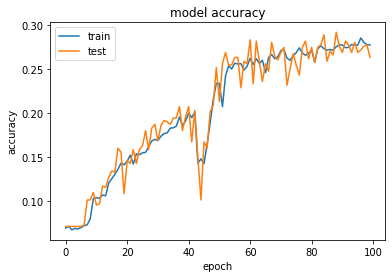

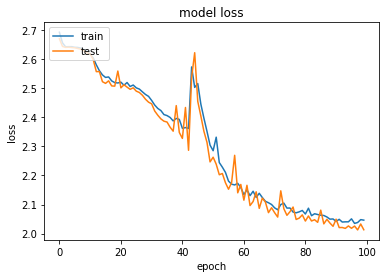

In [72]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2 layers RNN was more suitable. 

Now testing clipping threshold.

In [75]:
x_train1, y_train1, x_test1, y_test1 = chars()

lr = 10**-3
no_epochs = 100

model = Sequential()

#model.add(Embedding(vocab_size, 200, input_length=MAX_DOCUMENT_LENGTH))

model.add(GRU(20,input_shape =x_train1.shape[1:],return_sequences=True))
#model.add(BatchNormalization())
model.add(GRU(20))
model.add(Dense(MAX_LABEL))
model.add(Activation('softmax'))
opt = optimizers.Adam(lr=lr,clipvalue=2) #add clip threshold
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train1,y_train1,validation_data=(x_test1, y_test1),epochs=no_epochs,batch_size = 128)

Park Dinor
[ 80  97 114 107  32  68 105 110 111 114   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
5600
700
7
(5600,)
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_39 (GRU)                 (None, 100, 20)           1320      
_________________________________________________________________
gru_40 (GRU)                 (None, 20)                2460      
_________________________________________________________________
dense_60 (Dense)             (None, 15)                315       
_________________________________________________________________
activation_4

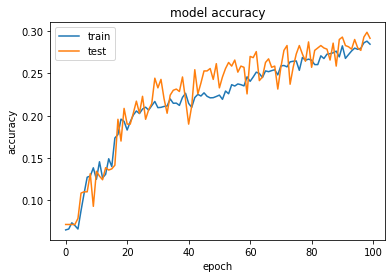

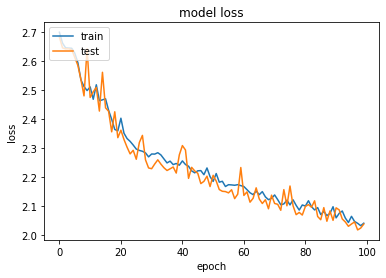

In [76]:
# summarize result for accuracy
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize result for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()